# **Project Overview**

In this project, we will analyze the Superstore dataset to uncover key business insights, trends, and performance metrics. The dataset covers various aspects of sales, profits, and customer behavior across multiple regions, segments, and product categories.

### **Objective:**
- To identify trends in sales, profits, and product performance.
- To evaluate the effect of discounts on sales and profits.
- To analyze customer behavior and identify key profit-generating segments.
- To assess order processing times and shipping modes in relation to profitability.

### **Dataset:**
The dataset used for this analysis is the **Superstore Dataset**, which contains information about orders, sales, profits, products, and customer demographics.

You can access the dataset on Kaggle using the following link:
[Superstore Dataset on Kaggle](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final)

---


# Importing Libraries

In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Loading and Preprocessing

## Loading the Dataset

In [255]:
df=pd.read_csv('superstore.csv',encoding='windows-1252')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9158,9159,CA-2014-134215,8/4/2014,8/8/2014,Standard Class,ML-17395,Marina Lichtenstein,Corporate,United States,Bangor,...,4401,East,TEC-AC-10002473,Technology,Accessories,Maxell 4.7GB DVD-R,255.4200,9.0,0.00,104.7222
9159,9160,CA-2016-118934,8/9/2016,8/14/2016,Standard Class,GH-14410,Gary Hansen,Home Office,United States,Hendersonville,...,37075,South,OFF-BI-10003314,Office Supplies,Binders,Tuff Stuff Recycled Round Ring Binders,4.3380,3.0,0.70,-3.0366
9160,9161,CA-2016-118934,8/9/2016,8/14/2016,Standard Class,GH-14410,Gary Hansen,Home Office,United States,Hendersonville,...,37075,South,OFF-BI-10004465,Office Supplies,Binders,Avery Durable Slant Ring Binders,11.8800,5.0,0.70,-7.9200
9161,9162,CA-2016-160108,12/8/2016,12/12/2016,Standard Class,AG-10900,Arthur Gainer,Consumer,United States,Eau Claire,...,54703,Central,FUR-BO-10003450,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Dark Cher...",405.8600,7.0,0.00,32.4688


## Superstore Dataset Column Descriptions



- **Row ID** → Unique ID for each row  
- **Order ID** → Unique Order ID for each Customer  
- **Order Date** → Order Date of the product  
- **Ship Date** → Shipping Date of the Product  
- **Ship Mode** → Shipping Mode specified by the Customer  

- **Customer ID** → Unique ID to identify each Customer  
- **Customer Name** → Name of the Customer  
- **Segment** → The segment where the Customer belongs  
- **Country** → Country of residence of the Customer  
- **City** → City of residence of the Customer  
- **State** → State of residence of the Customer  
- **Postal Code** → Postal Code of every Customer  
- **Region** → Region where the Customer belongs  

- **Product ID** → Unique ID of the Product  
- **Category** → Category of the product ordered  
- **Sub-Category** → Sub-Category of the product ordered  
- **Product Name** → Name of the Product  
- **Sales** → Sales of the Product  
- **Quantity** → Quantity of the Product  
- **Discount** → Discount provided  
- **Profit** → Profit/Loss incurred  


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9163 entries, 0 to 9162
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9163 non-null   int64  
 1   Order ID       9163 non-null   object 
 2   Order Date     9163 non-null   object 
 3   Ship Date      9163 non-null   object 
 4   Ship Mode      9163 non-null   object 
 5   Customer ID    9163 non-null   object 
 6   Customer Name  9163 non-null   object 
 7   Segment        9163 non-null   object 
 8   Country        9163 non-null   object 
 9   City           9163 non-null   object 
 10  State          9163 non-null   object 
 11  Postal Code    9163 non-null   int64  
 12  Region         9163 non-null   object 
 13  Product ID     9163 non-null   object 
 14  Category       9163 non-null   object 
 15  Sub-Category   9163 non-null   object 
 16  Product Name   9163 non-null   object 
 17  Sales          9162 non-null   float64
 18  Quantity

## Checking for Missing Values

In [257]:
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [258]:
df.dropna(inplace=True)

## Data Type Conversions

In [259]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])

In [260]:
cat_columns = ["Ship Mode", "Segment", "Country", "City", "State", "Region",
               "Category", "Sub-Category"]
for col in cat_columns:
  df[col]=df[col].astype('category')

## Feature Engineering: Creating New Columns

In [261]:
df['Year']=df['Order Date'].dt.year

In [262]:
df['Processing Time'] = (df['Ship Date'] - df['Order Date']).dt.days

In [263]:
df['Month']=df['Order Date'].dt.month

# Outlier Analysis

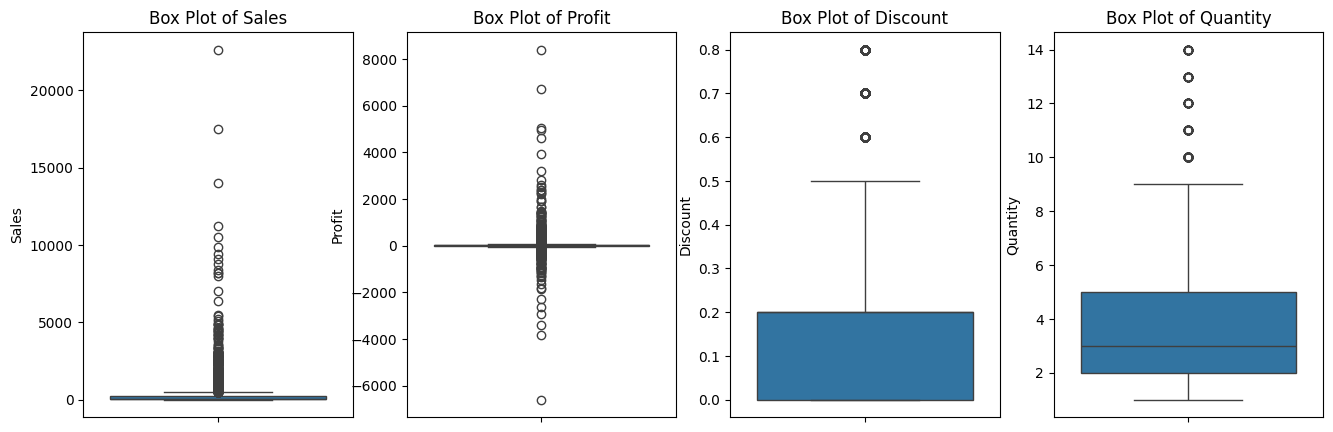

In [264]:
num_cols = ['Sales', 'Profit', 'Discount', 'Quantity']

fig, ax = plt.subplots(1, 4, figsize=(16, 5))
for i in range(4):
    sns.boxplot(y=df[num_cols[i]], ax=ax[i])
    ax[i].set_title(f'Box Plot of {num_cols[i]}')
plt.show()

In [265]:
number_of_outliers=dict()
for col in num_cols:
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  number_of_outliers[col]=len(df[(df[col]<q1-1.5*iqr) | (df[col]>q3+1.5*iqr)])

number_of_outliers

{'Sales': 1074, 'Profit': 1732, 'Discount': 789, 'Quantity': 155}

In [266]:
max(number_of_outliers.values())/len(df)

0.18904169395328532

### Outliers account for 19% of the data.

### Since we are focusing on business analysis, it is important to retain the outliers, especially as they represent significant values.Removing them could result in the loss of important insights that reflect exceptional business events or trends.Given the magnitude of these outliers, they provide valuable information that could be crucial for making informed business decisions.


# Sales and Profit Analysis

## Total Sales, Profit, and Quantity (2014-2017)

In [267]:
total_sales=df['Sales'].sum()
total_profit=df['Profit'].sum()
total_quantity=df['Quantity'].sum()
print(total_sales,total_profit,total_quantity)

2113233.8497 267075.6493 34764.0


The total sales revenue from 2014 to 2017 amounted to 2,113,233.85, with the total profit during this period reaching 267,075.65. Over the same time frame, the company sold a total of 34,764 units.

## Sales and Profit Growth

In [268]:
sales_over_years=df.groupby('Year')['Sales'].agg([np.sum,np.mean]).reset_index()
profit_over_years=df.groupby('Year')['Profit'].agg([np.sum,np.mean]).reset_index()
quantity_over_years=df.groupby('Year')['Quantity'].agg([np.sum,np.mean]).reset_index()
sales_over_years

,Year,sum,mean
0,2014,442156.9841,245.370135
1,2015,433222.9240,222.851298
2,2016,557879.1520,233.911594
3,2017,679974.7896,224.340082


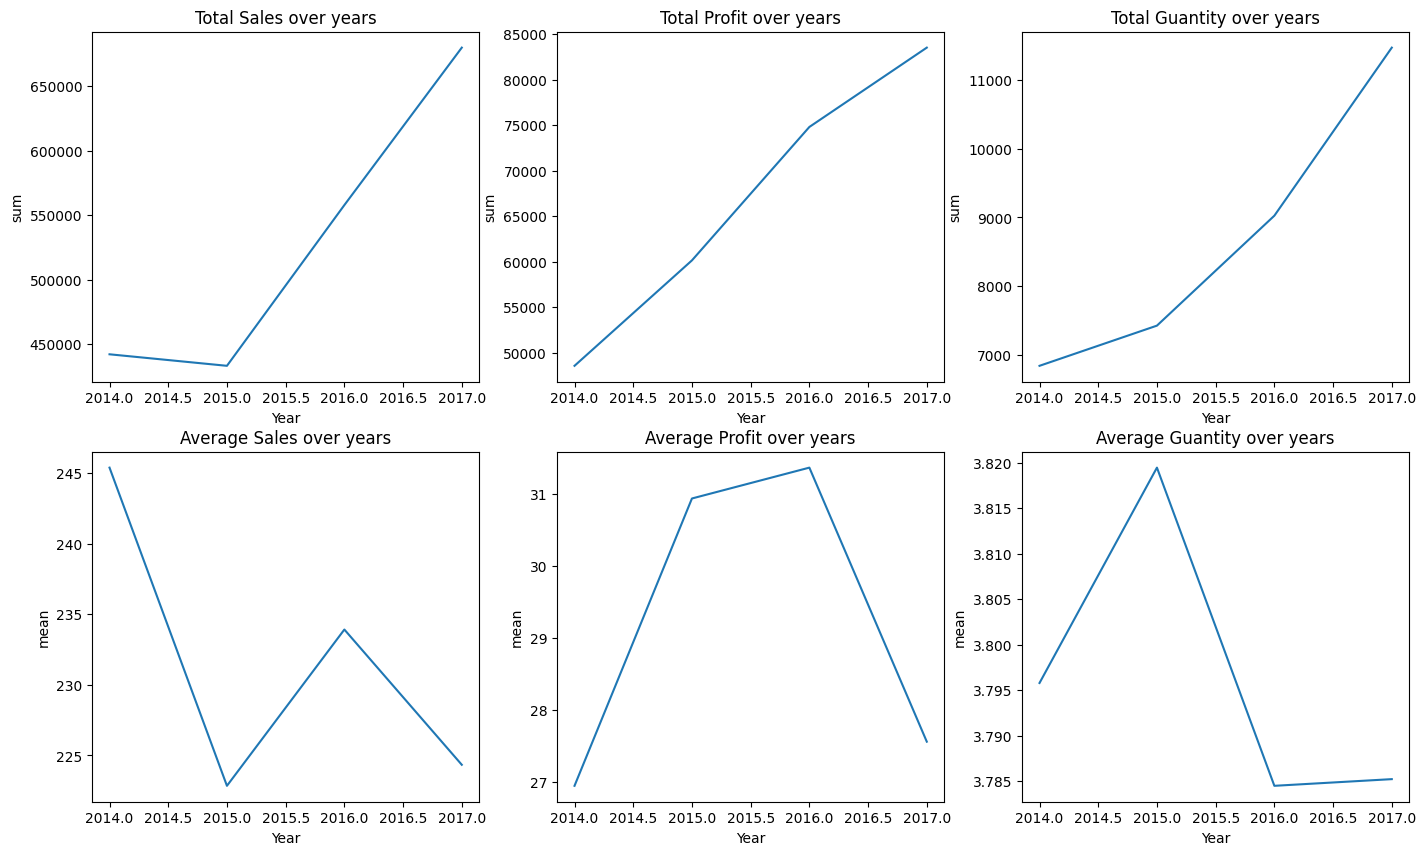

In [269]:
fig,ax=plt.subplots(2,3,figsize=(17,10))
sns.lineplot(data=sales_over_years,x='Year',y='sum',ax=ax[0,0])
ax[0,0].set_title('Total Sales over years')
sns.lineplot(data=profit_over_years,x='Year',y='sum',ax=ax[0,1])
ax[0,1].set_title('Total Profit over years')
sns.lineplot(data=quantity_over_years,x='Year',y='sum',ax=ax[0,2])
ax[0,2].set_title('Total Guantity over years')

sns.lineplot(data=sales_over_years,x='Year',y='mean',ax=ax[1,0])
ax[1,0].set_title('Average Sales over years')
sns.lineplot(data=profit_over_years,x='Year',y='mean',ax=ax[1,1])
ax[1,1].set_title('Average Profit over years')
sns.lineplot(data=quantity_over_years,x='Year',y='mean',ax=ax[1,2])
ax[1,2].set_title('Average Guantity over years')

plt.show()

In [270]:
rate_of_increase_sales=sales_over_years['sum'].pct_change().mean()
rate_of_increase_profit=profit_over_years['sum'].pct_change().mean()

print(rate_of_increase_sales,rate_of_increase_profit)

0.1621308960107826 0.19969492690183777



Between 2014 and 2017, the company saw a 16% increase in total sales revenue and a 20% increase in total profit, indicating positive growth in both areas.

Despite the overall growth, the average performance in sales revenue and profit showed some fluctuations, with both increases and decreases observed throughout the period. This suggests variability in the company's performance year over year.



## Impact of Discount on Profit Margins

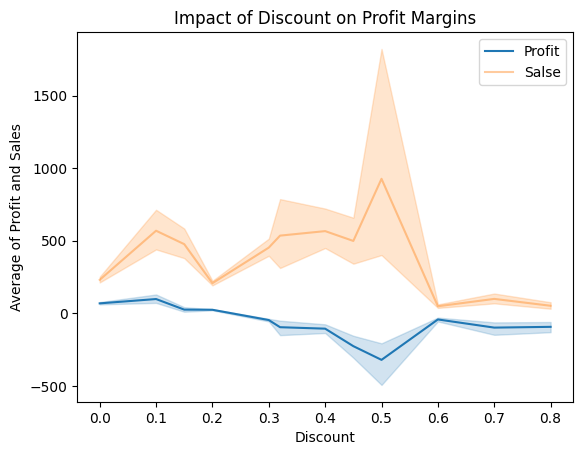

In [271]:
sns.lineplot(x='Discount',y='Profit',data=df,label='Profit')
sns.lineplot(x='Discount',y='Sales',data=df,alpha=0.4,label='Salse')
plt.title('Impact of Discount on Profit Margins')
plt.ylabel('Average of Profit and Sales')
plt.show()

### Impact of Discount on Sales and Profit
- When applying a 10% discount, both sales revenue and profit increased, suggesting that a moderate discount encourages more purchases while maintaining profitability.
- When the discount reaches 50%, sales revenue continue to increase, but profit decreases, likely due to the reduced profit margin per unit sold.
- At an 80% discount, neither sales revenue nor profit show significant change. This could indicate that customers may perceive heavily discounted products as low quality or untrustworthy, leading to no significant impact on purchasing behavior.

## Best and Worst-Performing Months

In [272]:
salse_profit_month=df.groupby('Month')[['Sales','Profit']].sum()

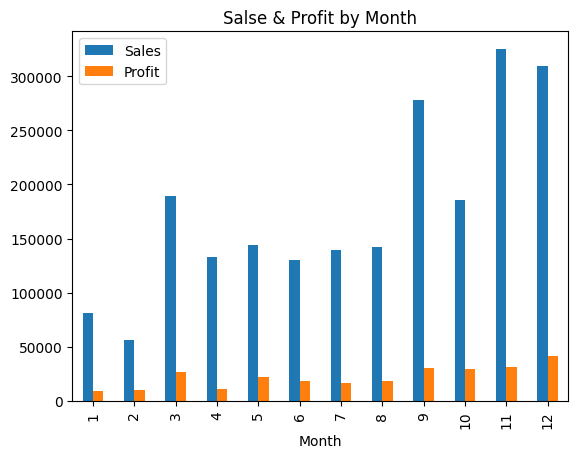

In [273]:
salse_profit_month.plot(kind='bar')
plt.title('Salse & Profit by Month')
plt.show()

- The worst-performing months appear to be January (1) and February (2), indicating lower sales revenue and profit during these periods.
- The best-performing months are November (11) and December (12), showing peak sales revenue and profitability.

# Product Category & Sub-Category Analysis

## Top-performing Categories

In [274]:
df['Category'].value_counts()
#this represent the count of rows
#but we need the total quantity for each category so we will sum the quantity

,count
Category,
Office Supplies,5514
Furniture,1941
Technology,1707


In [275]:
cat_amount={'Office Supplies':0 , 'Furniture':0, 'Technology':0}
for row in range(len(df)):
  cat_amount[df.iloc[row,14]]+=df.iloc[row,18]
cat_amount

{'Office Supplies': 20981.0, 'Furniture': 7367.0, 'Technology': 6416.0}

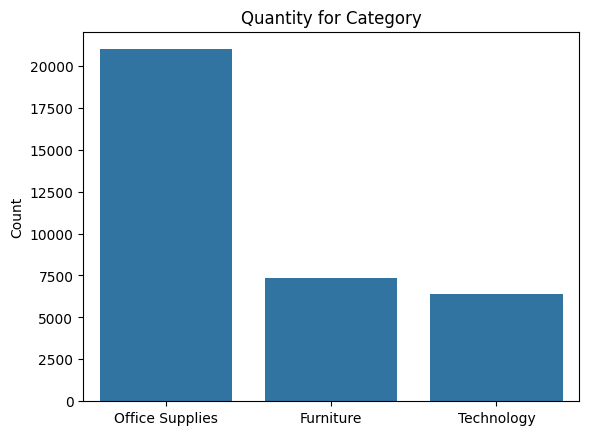

In [276]:
sns.barplot(cat_amount)
plt.title('Quantity for Category')
plt.ylabel('Count')
plt.show()

In [277]:
cat_sales_profit=df.groupby('Category')[['Sales','Profit']].sum()
cat_sales_profit

,Sales,Profit
Category,,
Furniture,669047.5747,15625.4195
Office Supplies,656224.8660,113780.2922
Technology,787961.4090,137669.9376


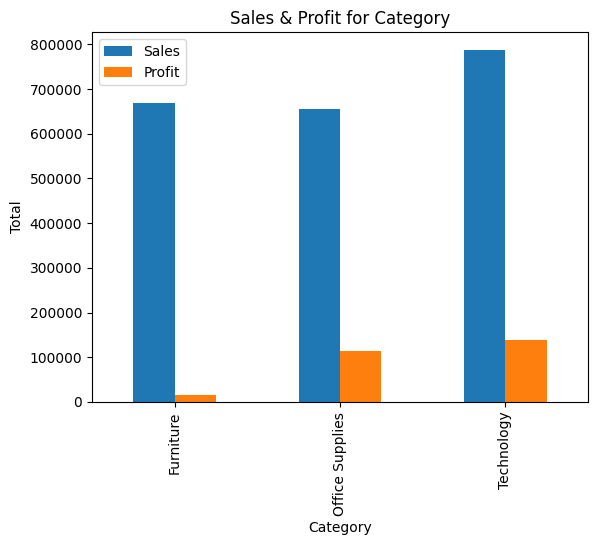

In [278]:
cat_sales_profit.plot(kind='bar')
plt.title('Sales & Profit for Category')
plt.ylabel('Total')
plt.show()

- The highest quantity of products sold belongs to the Office Supplies category, indicating strong demand for these items.
- The highest total sales revenue comes from the Technology category, suggesting that although fewer units are sold compared to Office Supplies, the higher price of tech products drives more revenue.
- The highest total profit is also from the Technology category, meaning that tech products not only generate the most revenue but also have higher profit margins compared to other categories.

This insight suggests that while Office Supplies contribute significantly to volume, Technology products are the key drivers of revenue and profitability.

## Top-performing Sub Categories

In [279]:
df['Sub-Category'].value_counts()

,count
Sub-Category,
Binders,1392
Paper,1250
Furnishings,874
Phones,819
Storage,783
Art,728
Accessories,713
Chairs,562
Appliances,425


In [280]:
#this function to calc the total sum of column with index col_index for each sub-categories
#like cal the sum of profit of each sub-categories
def get_sum_col_sub_cat(df,col_index):
  sub_cat=dict()
  for row in range(len(df)):
    if df.iloc[row,15] in sub_cat:
      sub_cat[df.iloc[row,15]]+=df.iloc[row,col_index]
    else:
      sub_cat[df.iloc[row,15]]=df.iloc[row,col_index]
  return sub_cat


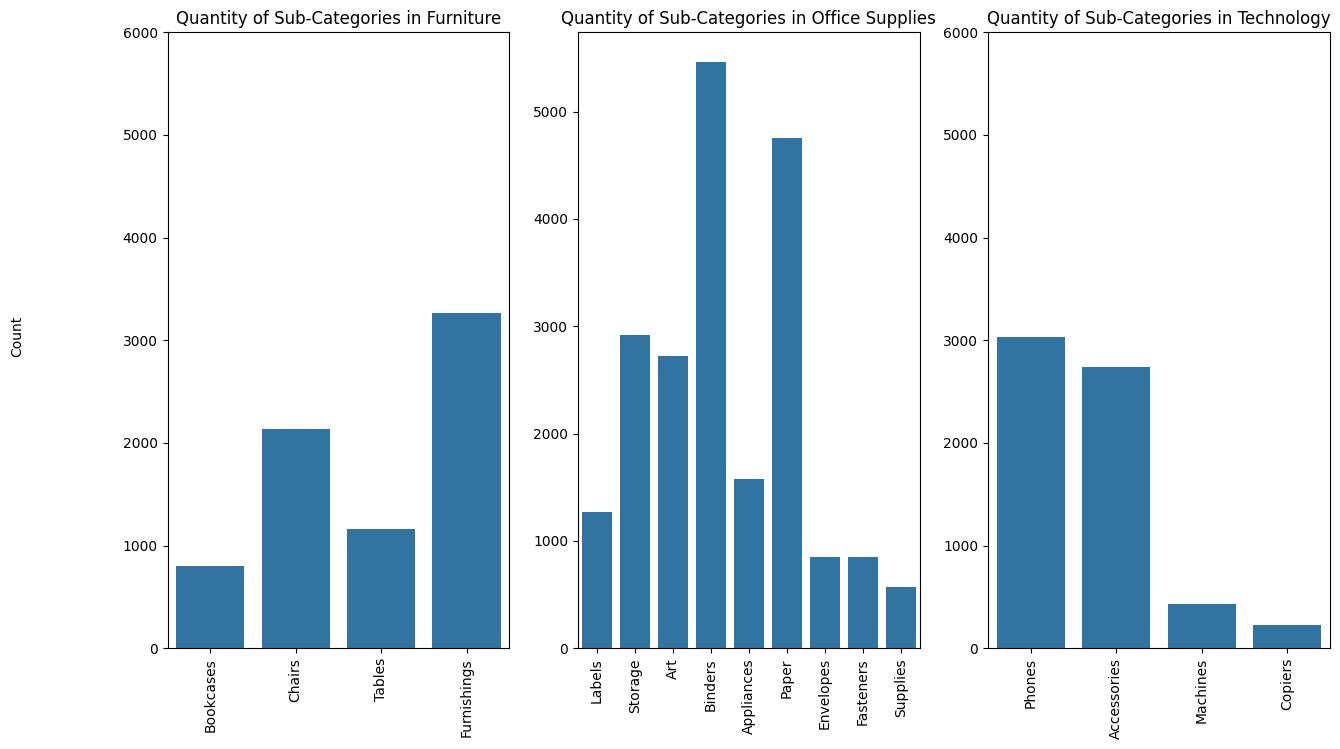

In [281]:
fig,ax=plt.subplots(1,3,figsize=(15, 8))
sns.barplot(get_sum_col_sub_cat(df[df['Category']=='Furniture'],18),ax=ax[0])
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_title('Quantity of Sub-Categories in Furniture')
ax[0].set_ylim(0, 6000)

sns.barplot(get_sum_col_sub_cat(df[df['Category']=='Office Supplies'],18),ax=ax[1])
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_title('Quantity of Sub-Categories in Office Supplies')

sns.barplot(get_sum_col_sub_cat(df[df['Category']=='Technology'],18),ax=ax[2])
ax[2].tick_params(axis='x', rotation=90)
ax[2].set_title('Quantity of Sub-Categories in Technology')
ax[2].set_ylim(0, 6000)
fig.supylabel('Count', fontsize=10)
plt.show()

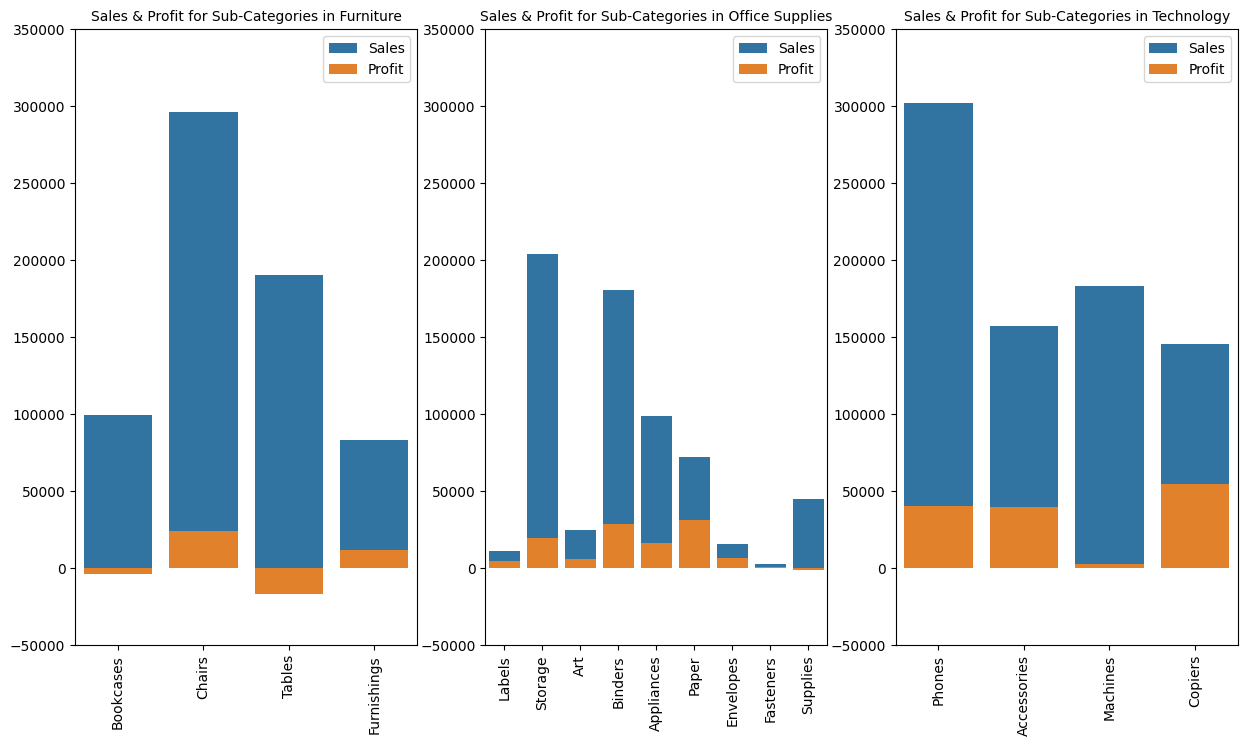

In [282]:
fig,ax=plt.subplots(1,3,figsize=(15, 8))
sns.barplot(get_sum_col_sub_cat(df[df['Category']=='Furniture'],17),ax=ax[0],label='Sales')
sns.barplot(get_sum_col_sub_cat(df[df['Category']=='Furniture'],20),ax=ax[0],label='Profit')
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_title('Sales & Profit for Sub-Categories in Furniture',fontsize=10)
ax[0].set_ylim(-50000, 350000)
ax[0].legend()

sns.barplot(get_sum_col_sub_cat(df[df['Category']=='Office Supplies'],17),ax=ax[1],label='Sales')
sns.barplot(get_sum_col_sub_cat(df[df['Category']=='Office Supplies'],20),ax=ax[1],label='Profit')
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_title('Sales & Profit for Sub-Categories in Office Supplies',fontsize=10)
ax[1].set_ylim(-50000, 350000)
ax[1].legend()

sns.barplot(get_sum_col_sub_cat(df[df['Category']=='Technology'],17),ax=ax[2],label='Sales')
sns.barplot(get_sum_col_sub_cat(df[df['Category']=='Technology'],20),ax=ax[2],label='Profit')
ax[2].tick_params(axis='x', rotation=90)
ax[2].set_title('Sales & Profit for Sub-Categories in Technology',fontsize=10)
ax[2].set_ylim(-50000, 350000)
ax[2].legend()

plt.show()

- The most sold subcategory by quantity in Furniture is Furnishings, showing strong demand in this product range.

- The most sold subcategory by quantity in Office Supplies is Binders, indicating that binders are the highest in demand within this category.

- The most sold subcategory by quantity in Technology is Phones, suggesting that mobile devices are the top-selling tech products.

- The highest profit in Furniture comes from Chairs, which likely have higher profit margins compared to other furniture items.

- The highest profit in Office Supplies is from Paper, indicating a strong margin for this commonly purchased item.

- The highest profit in Technology is from Copiers, which may have higher margins compared to other tech products like phones.

## Top-performing Products

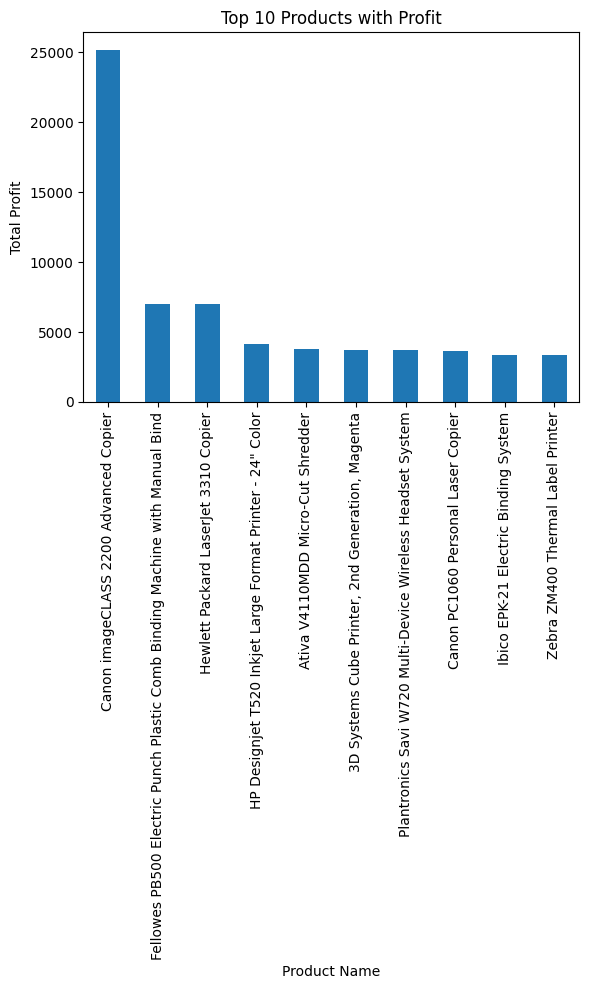

In [283]:
most_profit_products=df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False)[:10]
most_profit_products.plot(kind='bar')
plt.title('Top 10 Products with Profit')
plt.ylabel('Total Profit')
plt.show()

The following products contribute the highest profit to the
business, showcasing the top performers in terms of profitability:

1. Canon imageCLASS 2200 Advanced Copier
2. Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind
3. Hewlett Packard LaserJet 3310 Copier
4. HP Designjet T520 Inkjet Large Format Printer - 24" Color
5. Ativa V4110MDD Micro-Cut Shredder
6. 3D Systems Cube Printer, 2nd Generation, Magenta
7. Plantronics Savi W720 Multi-Device Wireless Headset System
8. Canon PC1060 Personal Laser Copier
9. Ibico EPK-21 Electric Binding System
10. Zebra ZM400 Thermal Label Printer

# Customer Analysis

In [284]:
print(df['Customer Name'].nunique())
print(df['Customer ID'].nunique())

789
789


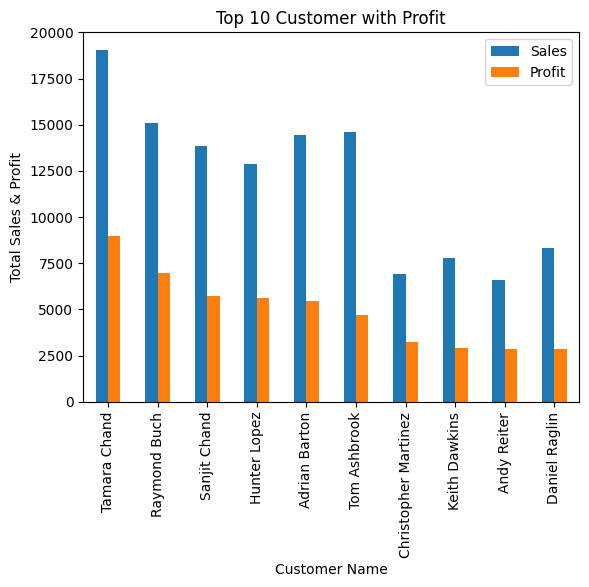

In [285]:
top_10_customer_in_profit=df.groupby('Customer Name')[['Sales','Profit']].sum().sort_values(['Profit','Sales'],ascending=[False,False])[:10]
top_10_customer_in_profit.plot(kind='bar')
plt.title("Top 10 Customer with Profit")
plt.ylabel('Total Sales & Profit')
plt.show()

The following customers have contributed the highest profit, reflecting their strong purchasing behavior and/or high-value orders:

1. Tamara Chand
2. Raymond Buch
3. Sanjit Chand
4. Hunter Lopez
5. Adrian Barton
6. Tom Ashbrook
7. Christopher Martinez
8. Keith Dawkins
9. Andy Reiter
10. Daniel Raglin

# Segment Analysis

In [286]:
df['Segment'].value_counts()

,count
Segment,
Consumer,4752
Corporate,2780
Home Office,1630


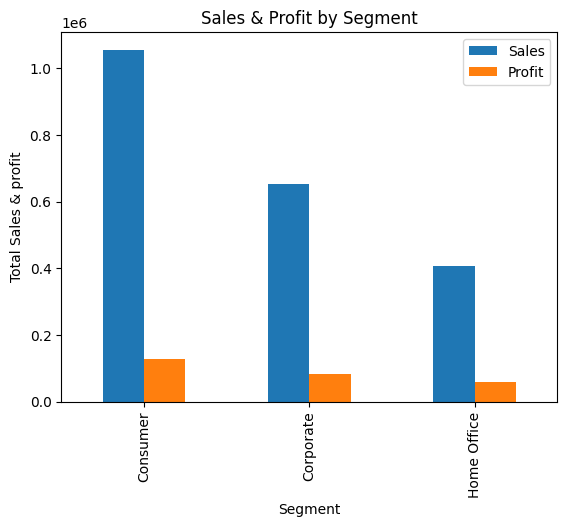

In [287]:
seg_profit_sales=df.groupby('Segment')[['Sales','Profit']].sum()
seg_profit_sales.plot(kind='bar')
plt.title('Sales & Profit by Segment')
plt.ylabel('Total Sales & profit')
plt.show()

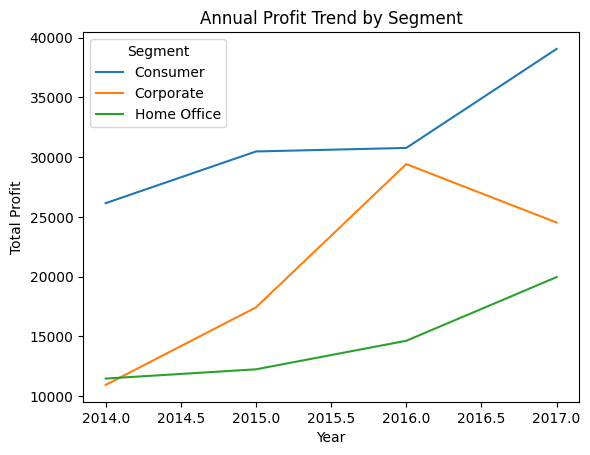

In [288]:
sns.lineplot(x='Year',y='Profit',data=df,hue='Segment',estimator='sum',ci=None)
plt.title('Annual Profit Trend by Segment')
plt.ylabel('Total Profit')
plt.show()


- The highest segment in profit is the Consumer segment, contributing the most to the overall profit.
- The annual profit for the Consumer and Home Office segments has shown an increase over the years, indicating steady growth in these categories.
- The Corporate segment's annual profit increased from 2014 to 2016, but experienced a decrease in 2016-2017, which may require further investigation to understand the underlying factors.

# Region & City Analysis

In [289]:
df['Region'].value_counts()

,count
Region,
West,2927
East,2586
Central,2120
South,1529


In [290]:
region_sales_profit=df.groupby('Region')[['Sales','Profit']].sum()

Text(0.5, 1.0, 'Total Sales & Profit by Region')

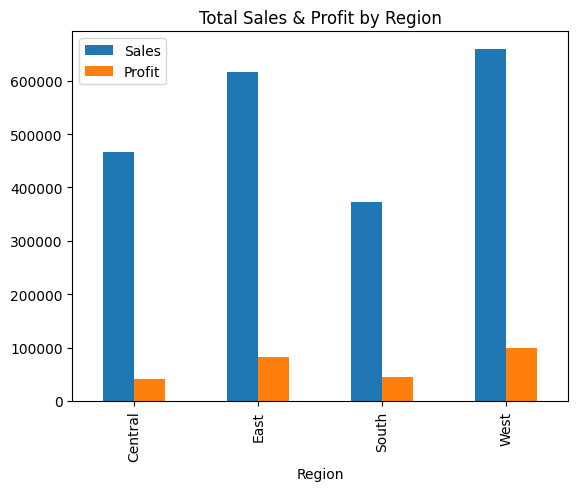

In [291]:
region_sales_profit.plot(kind='bar')
plt.title('Total Sales & Profit by Region')

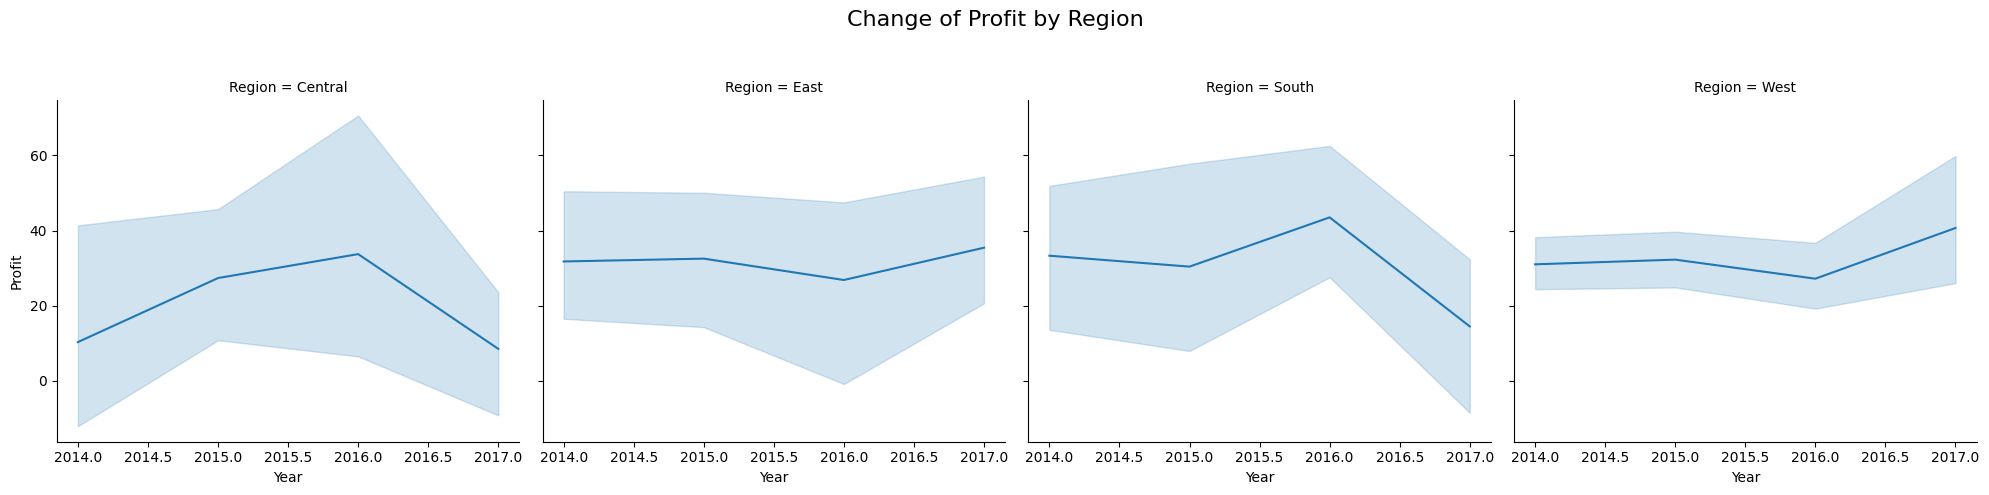

In [292]:
g = sns.relplot(kind='line', data=df, y='Profit', x='Year', col='Region')
g.figure.suptitle('Change of Profit by Region', fontsize=16)
g.figure.subplots_adjust(top=0.8)

In [293]:
df['City'].value_counts()

,count
City,
New York City,822
Los Angeles,680
Philadelphia,500
San Francisco,455
Seattle,390
...,...
Iowa City,1
Conroe,1
Conway,1


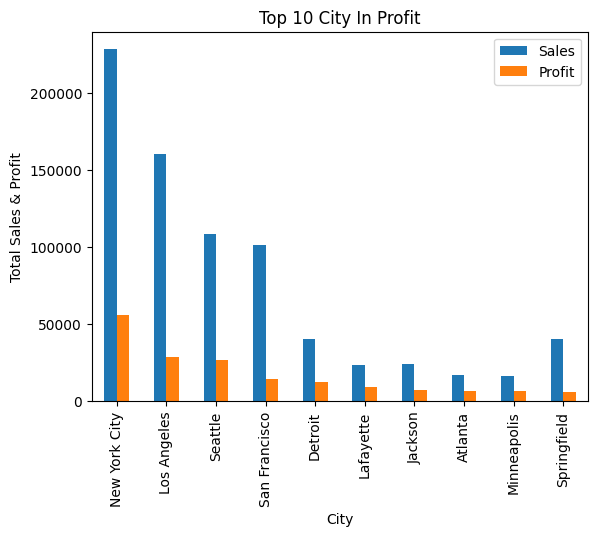

In [294]:
top_10_city_profit=df.groupby('City')[['Sales','Profit']].sum().sort_values('Profit',ascending=False)[:10]
top_10_city_profit.plot(kind='bar')
plt.title('Top 10 City In Profit')
plt.ylabel('Total Sales & Profit')
plt.show()

The West region has the highest profit, suggesting it is a key area for business success and may present opportunities for further growth and investment.

The following cities generate the highest profit, reflecting strong business performance in these regions:

1. New York City
2. Los Angeles
3. Seattle
4. San Francisco
5. Detroit
6. Lafayette
7. Jackson
8. Atlanta
9. Minneapolis
10. Springfield

# Shipping & Delivery Performance

In [295]:
df['Ship Mode'].value_counts()

,count
Ship Mode,
Standard Class,5484
Second Class,1777
First Class,1405
Same Day,496


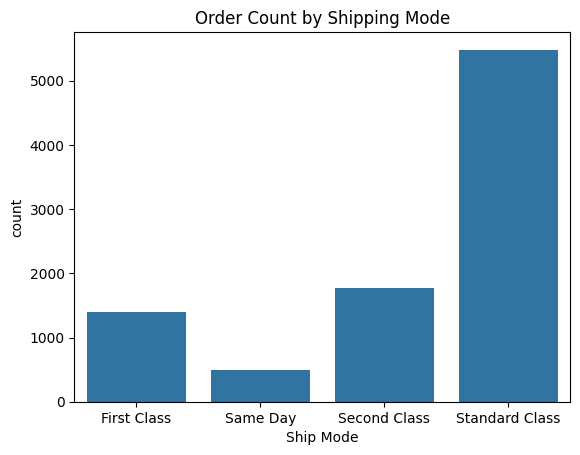

In [296]:
sns.countplot(x='Ship Mode',data=df)
plt.title('Order Count by Shipping Mode')
plt.show()

In [297]:
shipping_mode_sales_profit=df.groupby('Ship Mode')[['Sales','Profit']].sum()

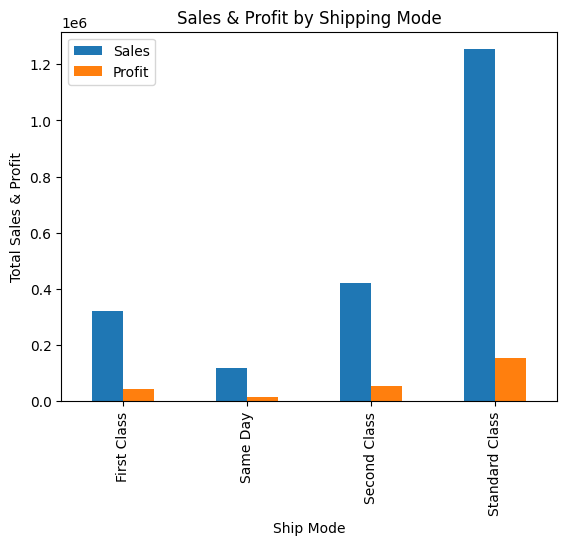

In [298]:
shipping_mode_sales_profit.plot(kind='bar')
plt.title('Sales & Profit by Shipping Mode')
plt.ylabel('Total Sales & Profit')
plt.show()

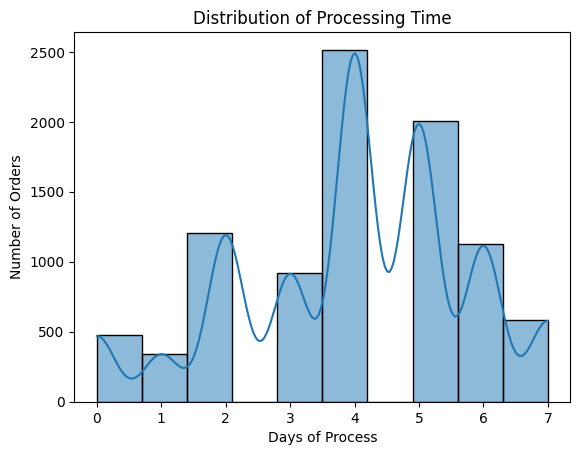

In [299]:
sns.histplot(df['Processing Time'], bins=10, kde=True)
plt.title('Distribution of Processing Time')
plt.xlabel('Days of Process')
plt.ylabel('Number of Orders')
plt.show()

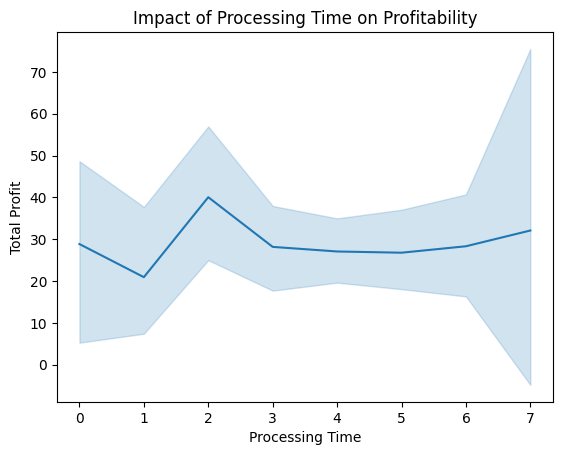

In [300]:
sns.lineplot(x='Processing Time',y='Profit',data=df)
plt.title('Impact of Processing Time on Profitability')
plt.ylabel('Total Profit')
plt.show()

- The highest shipping mode used is Standard Class, indicating that most customers prefer this option for its balance between cost and delivery time.
- Most of the orders take around 6 days to process, reflecting the typical time frame for completing an order from receipt to shipment.
- Interestingly, orders processed in around 1 day show low profit, which may suggest that rapid processing could be tied to operational inefficiencies, lower margins, or higher costs in handling.
- The highest profit is associated with orders processed in around 2 days, indicating that a balance between processing time and efficiency likely leads to better profitability.

# Summary

## 1. Overall Sales and Profit Trends
- Total sales from 2014 to 2017 reached **2,113,233.85**, with a **16% increase** over the period.
- Total profit during the same period amounted to **267,075.65**, marking a **20% increase**.
- While the total sales and profit have shown steady growth, the average performance in sales and profit exhibits fluctuations across the years.

## 2. Discount Analysis
- Applying a **10% discount** resulted in both **higher sales and profit**.
- Discounts around **50%** led to increased sales but decreased profit.
- **80% discounts** did not show significant changes in either sales or profit, possibly due to consumer skepticism toward heavily discounted products.

## 3. Monthly Performance
- **Best-performing months** in terms of sales and profit are **November (11)** and **December (12)**, likely due to the holiday shopping season.
- **Worst-performing months** are **January (1)** and **February (2)**, following the post-holiday slowdown.

## 4. Category Insights
- The **highest quantity sold** in the **Office Supplies** category is **Binders**, while **Technology** leads in terms of both total sales and profit.
- In **Furniture**, **Chairs** contribute the highest profit, while **Paper** is the most profitable item in Office Supplies, and **Copiers** drive the highest profit in Technology.

## 5. Top Products and Customers
- The **top 10 profit-generating products** include items like the **Canon imageCLASS Copier** and **Plantronics Savi Wireless Headset**, highlighting high-margin items.
- The **top 10 customers** contributing the highest profits include **Tamara Chand** and **Raymond Buch**, among others. Retaining and nurturing relationships with these customers could help sustain profitability.

## 6. Segmentation and Region
- The **Consumer segment** has the highest profit, with **Home Office** also showing steady increases in annual profit.
- The **Corporate segment** experienced a drop in profit from **2016 to 2017**, which may require further investigation.
- The **West region** consistently shows the highest profit, suggesting it is a key focus area for business strategies.

## 7. Order Processing & Shipping
- The most common shipping mode is **Standard Class**, with most orders taking around **6 days to process**.
- Interestingly, **1-day processing** leads to lower profit, possibly due to operational inefficiencies, while **2-day processing** yields the highest profit, indicating a balanced approach is optimal for profitability.
